<a href="https://colab.research.google.com/github/suhashj/Machine-Learning-projects/blob/main/Employee_Renege_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color = Green> Introduction </font>
<br>
<br>
In an organisation the recruitment teams have hard time to fill the vacant positions. They go through the rigorous process of hiring right from searching for applicants, screening and making an offer the job to prospective candidates. The candidates accept the offer but drop out before the join date. This is called __RENEGE__ in HR domain. So, high Renege means more unfilled positions.

We have data collected from different organizations. Lets use this data and get insights on what are the factors for Renege and how to tackle this problem.


### <font color = black> Import Libraries </font>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split              # To split the data into train and test sets
from sklearn.metrics import accuracy_score, recall_score          # To compute error metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier                   # To build Decision tree model
from sklearn.ensemble import RandomForestClassifier               # To build Random forest model

from sklearn.model_selection import GridSearchCV                  # To perform Grid Search using CV
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from scipy import stats


### <font color = blue> Load the Data </font>

In [ ]:
PATH = os.getcwd()
os.chdir(PATH)
data = pd.read_csv("Employee_Renege.csv")

### <font color = blue> Data Overview </font>

We have the data of 1999 employees who either joined or dropped the offer after getting an opportunity. For each of employee some data is gathered which is believed to effect the decision either individually or collectively. This data contains employees 

- Professional information
- Personal information
- Distance from home
- Interview details
- Offer details

So a total of 17 attributes are collected for each employee meaning number of columns in the data set are 17.

Lets see sample data and also check the dtypes for each column


In [ ]:
# Check the data dimensions
data.shape

(1999, 17)

In [ ]:
# Sample Data Check
data.head()

,age,marital_status,education_level,gender,percent_hike,distance_from_home,sourcing_channel,total_rounds,date_1st_contact,date_offered,satisfaction_index,no_companies_worked,career_growth,flexi_work,total_experience,timely_communication,offer_dropped
0,29,married,Associate Certification,Female,27.0,<15 kms,Internal Referrals,8.0,5/12/2015,10/14/2015,24,3.0,Lateral,Yes,5,No,Yes
1,37,married,Associate Degree,Female,22.0,<15 kms,Consultants,8.0,3/9/2015,9/3/2015,20,8.0,Lateral,Yes,13,No,Yes
2,28,married,Associate Certification,Female,32.0,<15 kms,Internal Referrals,8.0,12/17/2015,5/22/2016,23,4.0,Lateral,Yes,4,No,Yes
3,44,married,Associate Certification,Female,27.0,> 20 kms,Job Portals,9.0,12/11/2015,6/7/2016,26,6.0,Lateral,Yes,20,No,Yes
4,32,married,Bachelor Degree,Female,28.0,15-20 kms,Company Website,3.0,2/13/2016,3/11/2016,53,8.0,Vertical,Yes,8,No,No


In [ ]:
# Checking the Data Types
data.dtypes

age                       int64
marital_status           object
education_level          object
gender                   object
percent_hike            float64
distance_from_home       object
sourcing_channel         object
total_rounds            float64
date_1st_contact         object
date_offered             object
satisfaction_index        int64
no_companies_worked     float64
career_growth            object
flexi_work               object
total_experience          int64
timely_communication     object
offer_dropped            object
dtype: object

Let us calculate the percentage of employees who dropped the offer. This will give an idea on how challenging is to hire an employee.

In [ ]:
# Target Attribute "offer_dropped" frequency distribution
pd.value_counts(data["offer_dropped"])

Yes    1024
No      975
Name: offer_dropped, dtype: int64

In [ ]:
offer_dropped_percentage = len(data[data["offer_dropped"] == "Yes"])/len(data["offer_dropped"])
print(offer_dropped_percentage)

0.512256128064032


Lets have a look at data and see if there are any discrepancies like any attribute missing for employee and also observe the summary statistics.

In [ ]:
# Missing Value Check
data.isnull().sum()

age                     0
marital_status          0
education_level         0
gender                  0
percent_hike            1
distance_from_home      0
sourcing_channel        1
total_rounds            2
date_1st_contact        0
date_offered            0
satisfaction_index      0
no_companies_worked     2
career_growth           0
flexi_work              0
total_experience        0
timely_communication    0
offer_dropped           0
dtype: int64

In [ ]:
# Data Summary Understanding before data type conversions
data.describe(include = 'all')

,age,marital_status,education_level,gender,percent_hike,distance_from_home,sourcing_channel,total_rounds,date_1st_contact,date_offered,satisfaction_index,no_companies_worked,career_growth,flexi_work,total_experience,timely_communication,offer_dropped
count,1999.000000,1999,1999,1999,1998.000000,1999,1998,1997.000000,1999,1999,1999.000000,1997.000000,1999,1999,1999.000000,1999,1999
unique,NaN,4,4,2,NaN,3,5,NaN,252,573,NaN,NaN,2,2,NaN,2,2
top,NaN,married,Associate Degree,Male,NaN,> 20 kms,Job Portals,NaN,3/31/2015,10/20/2015,NaN,NaN,Lateral,Yes,NaN,No,Yes
freq,NaN,1389,624,1517,NaN,781,486,NaN,54,9,NaN,NaN,1286,1177,NaN,1188,1024
mean,35.378189,NaN,NaN,NaN,21.103604,NaN,NaN,6.485228,NaN,NaN,40.383692,4.781673,NaN,NaN,11.103552,NaN,NaN
std,6.132589,NaN,NaN,NaN,8.932102,NaN,NaN,2.605184,NaN,NaN,23.485313,1.925830,NaN,NaN,6.057349,NaN,NaN
min,25.000000,NaN,NaN,NaN,10.000000,NaN,NaN,3.000000,NaN,NaN,15.000000,1.000000,NaN,NaN,1.000000,NaN,NaN
25%,30.000000,NaN,NaN,NaN,13.000000,NaN,NaN,4.000000,NaN,NaN,22.000000,3.000000,NaN,NaN,6.000000,NaN,NaN
50%,35.000000,NaN,NaN,NaN,19.000000,NaN,NaN,7.000000,NaN,NaN,29.000000,5.000000,NaN,NaN,11.000000,NaN,NaN
75%,41.000000,NaN,NaN,NaN,29.000000,NaN,NaN,9.000000,NaN,NaN,59.000000,6.000000,NaN,NaN,16.000000,NaN,NaN


## <font color = green> Data Preprocessing </font>

### <font color = blue> Data Type Conversions </font>

Before diving deep in to the data and understand the factors for __RENEGE__ and solve it lets do some data Pre-processing
When we read the data the date columns like date_offered, date_1st_contact and categorical columns like marital_status, education_level, gender etc... are read as Object in Pandas data frame. 
Lets type cast them to appropriate types.

In [ ]:
# Convert variables to Date
cols = ['date_1st_contact','date_offered']
data[cols] = data[cols].apply(pd.to_datetime)


Checking data types after type casting

In [ ]:
data.dtypes

age                              int64
marital_status                  object
education_level                 object
gender                          object
percent_hike                   float64
distance_from_home              object
sourcing_channel                object
total_rounds                   float64
date_1st_contact        datetime64[ns]
date_offered            datetime64[ns]
satisfaction_index               int64
no_companies_worked            float64
career_growth                   object
flexi_work                      object
total_experience                 int64
timely_communication            object
offer_dropped                   object
dtype: object

#### <font color = brown>Convert all category variables and check</font>

In [ ]:
# Convert variables to Category
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col] = data[col].astype("category")

In [ ]:
data.dtypes

age                              int64
marital_status                category
education_level               category
gender                        category
percent_hike                   float64
distance_from_home            category
sourcing_channel              category
total_rounds                   float64
date_1st_contact        datetime64[ns]
date_offered            datetime64[ns]
satisfaction_index               int64
no_companies_worked            float64
career_growth                 category
flexi_work                    category
total_experience                 int64
timely_communication          category
offer_dropped                 category
dtype: object

### <font color=green>Missing Value Imputation </font>

Earlier we seen that we have 6 instances in total where we did not have employee information. These missing values are present in the "offer dropped", "date_1st_contact","data_offered" attributes. 
Here we shall see the 2 out of 3 approaches to handle the missing values
1. As the missing values are very small. Delete the employees for whome we have the missing information.
2. Impute the missing values using the central tendencies

In [ ]:
data1 = data.dropna(axis = 0)

In [ ]:
data1.shape

(1993, 17)

In [ ]:
# Dropping the rows where target variable is missing and the date variables, 
# where it is difficult to estimate 
#data = data.dropna(subset=['offer_dropped','date_1st_contact','date_offered'])

In [ ]:
print(data.shape)


(1999, 17)


In [ ]:
data.isnull().sum()

age                     0
marital_status          0
education_level         0
gender                  0
percent_hike            1
distance_from_home      0
sourcing_channel        1
total_rounds            2
date_1st_contact        0
date_offered            0
satisfaction_index      0
no_companies_worked     2
career_growth           0
flexi_work              0
total_experience        0
timely_communication    0
offer_dropped           0
dtype: int64

#### <font color = brown>Imputation</font>

For numerical columns one can use __mean__ or __median__ central tendency to impute the missing values.
<br>For categorical columns we can use __mode__ as the central tendency to impute.
<br>
<br>
So lets get all the numerical column names and categorical names from the data set

In [ ]:
num_cols = data.select_dtypes(include=['float64','int64'])
cat_cols = data.select_dtypes(include=['category'])
print(num_cols.columns) # print the numeric columns
cat_cols.head()

Index(['age', 'percent_hike', 'total_rounds', 'satisfaction_index',
       'no_companies_worked', 'total_experience'],
      dtype='object')


,marital_status,education_level,gender,distance_from_home,sourcing_channel,career_growth,flexi_work,timely_communication,offer_dropped
0,married,Associate Certification,Female,<15 kms,Internal Referrals,Lateral,Yes,No,Yes
1,married,Associate Degree,Female,<15 kms,Consultants,Lateral,Yes,No,Yes
2,married,Associate Certification,Female,<15 kms,Internal Referrals,Lateral,Yes,No,Yes
3,married,Associate Certification,Female,> 20 kms,Job Portals,Lateral,Yes,No,Yes
4,married,Bachelor Degree,Female,15-20 kms,Company Website,Vertical,Yes,No,No


Missing values imputation


In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
num_data = pd.DataFrame(imp.fit_transform(num_cols),columns=num_cols.columns)
imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
cat_data = pd.DataFrame(imp.fit_transform(cat_cols),columns=cat_cols.columns)
cat_data.head()

,marital_status,education_level,gender,distance_from_home,sourcing_channel,career_growth,flexi_work,timely_communication,offer_dropped
0,married,Associate Certification,Female,<15 kms,Internal Referrals,Lateral,Yes,No,Yes
1,married,Associate Degree,Female,<15 kms,Consultants,Lateral,Yes,No,Yes
2,married,Associate Certification,Female,<15 kms,Internal Referrals,Lateral,Yes,No,Yes
3,married,Associate Certification,Female,> 20 kms,Job Portals,Lateral,Yes,No,Yes
4,married,Bachelor Degree,Female,15-20 kms,Company Website,Vertical,Yes,No,No


In [ ]:
num_data.head()

,age,percent_hike,total_rounds,satisfaction_index,no_companies_worked,total_experience
0,29.0,27.0,8.0,24.0,3.0,5.0
1,37.0,22.0,8.0,20.0,8.0,13.0
2,28.0,32.0,8.0,23.0,4.0,4.0
3,44.0,27.0,9.0,26.0,6.0,20.0
4,32.0,28.0,3.0,53.0,8.0,8.0


Getting the Final dataset after conversions and missing values imputation

In [ ]:
data.columns

Index(['age', 'marital_status', 'education_level', 'gender', 'percent_hike',
       'distance_from_home', 'sourcing_channel', 'total_rounds',
       'date_1st_contact', 'date_offered', 'satisfaction_index',
       'no_companies_worked', 'career_growth', 'flexi_work',
       'total_experience', 'timely_communication', 'offer_dropped'],
      dtype='object')

In [ ]:
data_final = pd.concat([num_data,cat_data,data.loc[:,["date_1st_contact","date_offered"]]],axis=1)
data_final.head(5)

,age,percent_hike,total_rounds,satisfaction_index,no_companies_worked,total_experience,marital_status,education_level,gender,distance_from_home,sourcing_channel,career_growth,flexi_work,timely_communication,offer_dropped,date_1st_contact,date_offered
0,29.0,27.0,8.0,24.0,3.0,5.0,married,Associate Certification,Female,<15 kms,Internal Referrals,Lateral,Yes,No,Yes,2015-05-12,2015-10-14
1,37.0,22.0,8.0,20.0,8.0,13.0,married,Associate Degree,Female,<15 kms,Consultants,Lateral,Yes,No,Yes,2015-03-09,2015-09-03
2,28.0,32.0,8.0,23.0,4.0,4.0,married,Associate Certification,Female,<15 kms,Internal Referrals,Lateral,Yes,No,Yes,2015-12-17,2016-05-22
3,44.0,27.0,9.0,26.0,6.0,20.0,married,Associate Certification,Female,> 20 kms,Job Portals,Lateral,Yes,No,Yes,2015-12-11,2016-06-07
4,32.0,28.0,3.0,53.0,8.0,8.0,married,Bachelor Degree,Female,15-20 kms,Company Website,Vertical,Yes,No,No,2016-02-13,2016-03-11


### <font color = blue>Feature Engineering - New Variable Creation </font>

Using the Domain knowledge or by understanding the data it is always good to create a new data attribute this is called feature engineering

The following 2 parameters below are not calculated but play an important role to understand the __RENEGE__ problem.
1. Job Hopping Index
2. Days between first contacted and offered rolled out.

__Job Hopping Index__<br>
we know that Job hopping is a concern for the organization. To mitigate this let us measure the job hopping index for the employee and take that in to the account before offering the job. Let us calculate the job hopping index using the below formula and incorporate in to the data set.<br>
<font color = brown>job_hopping_index(jhi) = Total_Experience/number_of_companies_worked</font>

__Days Offered__<br>
<font color = brown>days_offeted = date_offered - date_1st_contact</font>

In [ ]:
# Create job hopping index: jhi 

data_final["jhi"] = data_final["total_experience"]/data_final["no_companies_worked"]

In [ ]:
# create days to offer: days_offered

data_final["days_offered"] = pd.to_datetime(data_final["date_offered"],format='%m/%d/%Y') - pd.to_datetime(data_final["date_1st_contact"],format='%m/%d/%Y')



In [ ]:
data_final["days_offered"].head()

0   155 days
1   178 days
2   157 days
3   179 days
4    27 days
Name: days_offered, dtype: timedelta64[ns]

Days offered column data type is given as time delta. we need to convert it to integer

In [ ]:
data_final["days_offered"] = np.int64(data_final["days_offered"]/np.timedelta64(1,'D'))

In [ ]:
data_final["days_offered"].head()

0    155
1    178
2    157
3    179
4     27
Name: days_offered, dtype: int64

Before further Analysis lets drop all the unnecessary attributes from the data set. This will help in reducing the computational over head and time with huge data sets. This is very important part of engineering

In [ ]:
data.shape

(1999, 17)

In [ ]:
# Remove original variables for avoiding redundancy : "date_1st_contact", "date_offered", "no_companies_worked", "total_experience"  
# Remove variables you think are not possible to collect : "satisfaction_index"
data_final=data_final.loc[:,data_final.columns.difference(["date_1st_contact","date_offered","no_companies_worked","total_experience","satisfaction_index"])]




In [ ]:

data_final.shape

(1999, 14)

In [ ]:
data = data_final.copy()

## <font color = green>Exploratory Data Analysis</font>

### <font color = blue>Univariate Analysis</font>

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved.

We will start with categorical variables

#### <font color = brown> Marital Status - Visual approach </font>

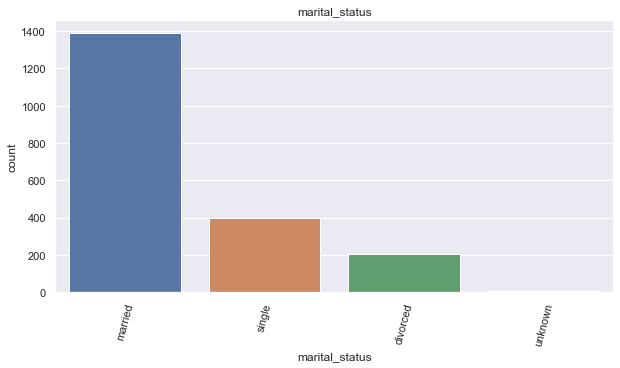

In [ ]:
plt.figure(figsize = (10,5)) # Setting figure parameters 
sns.set(style="darkgrid")
sns.countplot(x='marital_status', data=data).set_title('marital_status') # Plot
plt.xticks(rotation = 75) # Setting labels
plt.show()

__Insight: The bar chart shows married candidates have highest frequency__

#### <font color = brown> Martial Status - Metric approach </font>

In [ ]:
martial_status_perc = len(data[data['marital_status'] == "married"])/len(data['marital_status'])
print(martial_status_perc)


0.6948474237118559


__Insight: Married candidates have 69% of the total__

#### <font color =brown> Age Distribution - Visual approach </font>

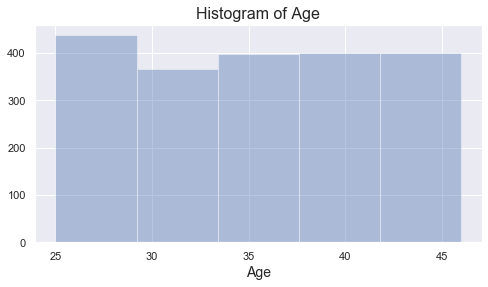

In [ ]:
plt.figure(figsize = (8,4))
b = sns.distplot(data['age'],kde=False,bins = 5)
b.set_title('Histogram of Age',fontsize = 16)
b.set_xlabel("Age",fontsize=14)
plt.show()

__Insight: There is no significance change in the age groups__

#### <font color = brown>Job Hopping Index - Visual approach</font>

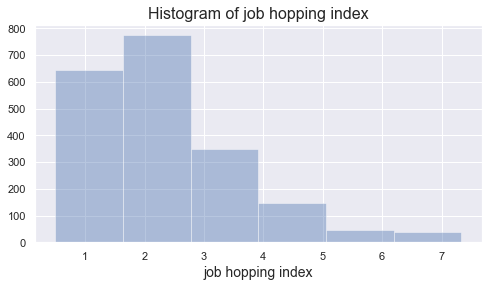

In [ ]:
plt.figure(figsize = (8,4))
b = sns.distplot(data['jhi'],kde=False,bins=6)
b.set_title('Histogram of job hopping index',fontsize = 16)
b.set_xlabel("job hopping index",fontsize=14)
plt.show()

__Insight: Maximum job hopping index ranges from 0.5 to 3__

#### <font color = brown>Job Hopping Index - Metric approach </font>

In [ ]:
data["jhi"].describe()

count    1999.000000
mean        2.367537
std         1.272728
min         0.500000
25%         1.400000
50%         2.142857
75%         3.000000
max         7.333333
Name: jhi, dtype: float64

__Insight: Higher job hoping index at 7.5 and lower at 0.5__

#### <font color = brown> Days Offered - Visual approach</font>

In [ ]:
data_final.columns

Index(['age', 'career_growth', 'days_offered', 'distance_from_home',
       'education_level', 'flexi_work', 'gender', 'jhi', 'marital_status',
       'offer_dropped', 'percent_hike', 'sourcing_channel',
       'timely_communication', 'total_rounds'],
      dtype='object')

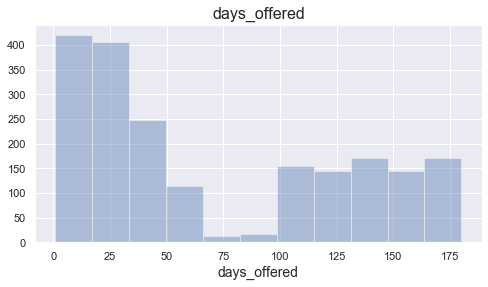

In [ ]:
plt.figure(figsize = (8,4))
b = sns.distplot(data['days_offered'],kde = False)
b.set_title('days_offered',fontsize = 16)
b.set_xlabel("days_offered",fontsize=14)
plt.show()

__Insight: Candidates were offered job as less as 1 day to maximum 180 days__

#### <font color = brown> Days Offered - Metric approach</font>

In [ ]:
days_offered_gt_120 = len(data[data['days_offered'] > 120])/len(data['days_offered'])
print(days_offered_gt_120)

0.29164582291145574


__Insight: Approx 30% of candidates were offered job after 120 days__

<font color = red> Activity for practice </font>

In [ ]:

## Analyse the distribution and patterns for the remaining variables
data.columns

Index(['age', 'career_growth', 'days_offered', 'distance_from_home',
       'education_level', 'flexi_work', 'gender', 'jhi', 'marital_status',
       'offer_dropped', 'percent_hike', 'sourcing_channel',
       'timely_communication', 'total_rounds'],
      dtype='object')

### <font color = blue>Bivariate Analysis</font>

Bivariate Analysis is done between two variables. Nature of variables can be Categorical or Numerical;
Different charts and statistics are used to understand the relationship between two variables such as:
1. Numerical vs Numerical Variable
   Visualisations : Correlation Plot, Scatter Plot, Line Chart, regression chart
   Statistical Approach: correlation or covariance values, ANOVA method, Regression Analysis
2. Categorical vs Categorical Variable
   Visualisations : Bar Plot, Stacked Bar Chart, Grouped Bar Chart, Advanced Charts
   Statistical Approach : Prop Table Analysis, Chi-Square Test of Independence
3. Numerical vs Categorical Variable: 
   Visualisations : Box Plot with Categorical variable on x-axis, Advanced Charts
   Statistical Approach : Two Sample T-Test
   
Bivariate Analysis can be done between any two independent variables; 
However, analysis of independent variable w.r.t dependent variable (target) is very important
     

In [ ]:
data.dtypes

age                      float64
career_growth           category
days_offered               int64
distance_from_home      category
flexi_work              category
jhi                      float64
offer_dropped           category
percent_hike             float64
sourcing_channel        category
timely_communication    category
total_rounds             float64
dtype: object

#### <font color = brown>Numeric to Numeric Variables Relationship Analysis</font>

Let us examine if any 2 pieces of data for an employee have a relation. There are 17 attributes how to know if there is a relation between 2 variables. The best way to know about this is by calculating the correlation between all the pairs of numerical data.<br>
This is called __CORRELATION ANALYSIS__
<br><br>
The best way to do the correlation analysis is by plotting them.

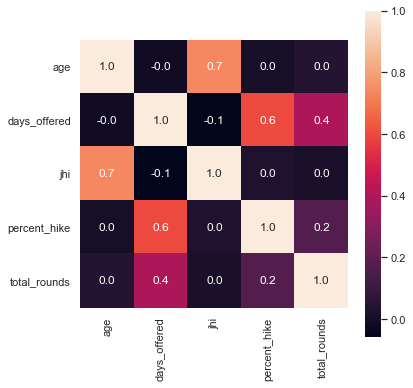

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
corr = data.corr(method='pearson')
sns.heatmap(corr,square=True, ax=ax,annot=True,fmt=".1f")


__(days_offered,percent_hike), (age,jhi) are correlated above 0.60__

It is good idea to see the relation between the following attributes
- days_offered vs sourcing_channel
- education level vs job hopping index

<br>
If you observe in the above 2 cases one variable is numerical variable and the other one is categorical variable.

So this is __Numerical variable relationship w.r.t Category__
<br> Let us see how to plot them.

#### <font color = brown>days_offered vs sourcing_channel</font>

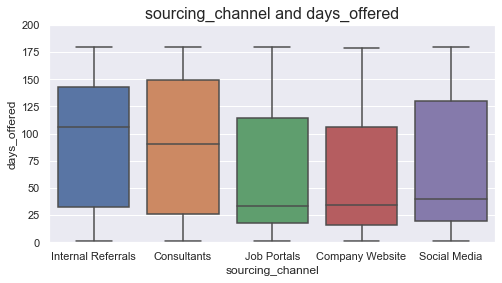

In [ ]:
plt.figure(figsize = (8,4))

g = sns.boxplot(x="sourcing_channel",y="days_offered", data=data)

plt.title('sourcing_channel and days_offered',fontsize = 16)
plt.ylim ([0,200])

plt.ylabel("days_offered",fontsize=12)
plt.xlabel("sourcing_channel",fontsize=12)
plt.show()

#### <font color=brown>education level vs job hopping index</font>

In [ ]:
data.columns

Index(['age', 'career_growth', 'days_offered', 'distance_from_home',
       'education_level', 'flexi_work', 'gender', 'jhi', 'marital_status',
       'offer_dropped', 'percent_hike', 'sourcing_channel',
       'timely_communication', 'total_rounds'],
      dtype='object')

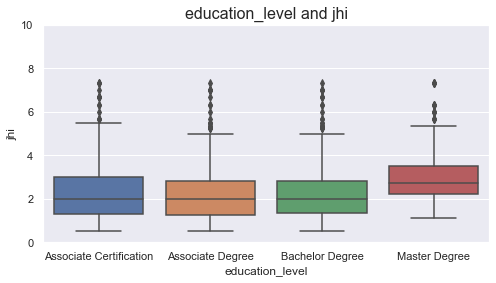

In [ ]:
plt.figure(figsize = (8,4))

g = sns.boxplot(x="education_level",y="jhi", data=data_final)

plt.title('education_level and jhi',fontsize = 16)
plt.ylim ([0,10])

plt.ylabel("jhi",fontsize=12)
plt.xlabel("education_level",fontsize=12)
plt.show()

### <font color = blue>Exploratory Data Analysis w.r.t Target Variable "offer_dropped"</font>

Here we are trying to understand why employees are dropping the offer. So the target variable is offer_dropped.
It is good thing to understand the relationship between different variables versus the target variable.

#### <font color= brown>Category vs Category Variable Analysis</font>
#### <font color = brown>sourcing_channel vs offer_dropped</font>

In [ ]:
ct = pd.crosstab(data['sourcing_channel'], data['offer_dropped'])
ct

offer_dropped,No,Yes
sourcing_channel,,
Company Website,204,149
Consultants,194,264
Internal Referrals,85,196
Job Portals,284,203
Social Media,208,212


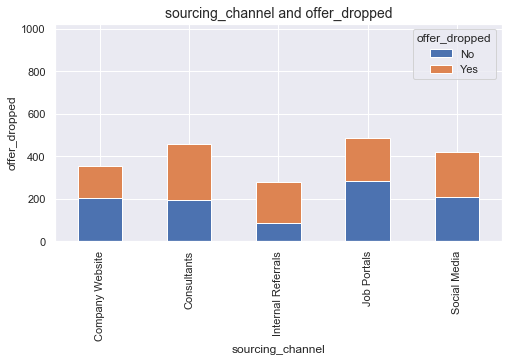

In [ ]:
ct = pd.crosstab(data['sourcing_channel'], data['offer_dropped'])
ct.plot.bar(stacked=True,figsize = (8,4))

plt.title('sourcing_channel and offer_dropped',fontsize = 14)
plt.xlabel('sourcing_channel',fontsize = 12)
plt.ylabel('offer_dropped',fontsize = 12)

plt.legend(title='offer_dropped')
plt.ylim(0,max(sum(ct.values)))
plt.show()

Lets understand how different variables are stacked against the target variable Offer dropped.
To do this lets plot number of employees who has dropped the offer vs accepted the offer. We plot this with respect to each variable

#### <font color = brown>Grouped Bar plot with table proportions </font>

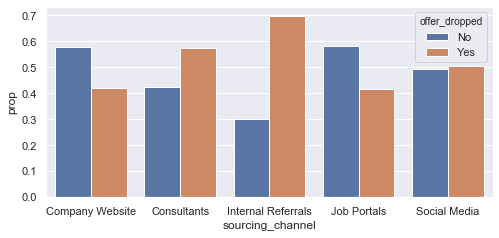

In [ ]:
plt.rcParams["figure.figsize"] = (8,3.5)
y='prop'
prop_data = (data['offer_dropped']
           .groupby(data['sourcing_channel'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
sns.barplot(x="sourcing_channel", y="prop", hue="offer_dropped", data=prop_data)

In [ ]:
print(prop_data)

     sourcing_channel offer_dropped      prop
0     Company Website            No  0.577904
1     Company Website           Yes  0.422096
2         Consultants           Yes  0.576419
3         Consultants            No  0.423581
4  Internal Referrals           Yes  0.697509
5  Internal Referrals            No  0.302491
6         Job Portals            No  0.583162
7         Job Portals           Yes  0.416838
8        Social Media           Yes  0.504762
9        Social Media            No  0.495238


## <font color=green>Statistical Approach</font>
### <font color = blue> Chi-Square Test </font>

Earlier we plotted the numbers between sourcing channel and the offer dropped.<br>
<font color = red>Do we think that there is really a relationship between these 2 variables?
<br>
If yes is there any statistical approach to do the same??</font>

### <font color = blue>Hypothesis Testing - Categorical Variables</font>


The __chi-square__ test of independence is used to determine if there is a significant relationship between two 
nominal (categorical) variables.
The __null hypothesis__ for this test is that there is no relationship between the variables and the __alternate hypothesis__ that there is a relationship

#### <font color = brown>Test 1</font>
Test whether there is a significant relationship between sourcing_channel dropping offer_dropped

#### <font color = brown>Hypothesis Statement</font>
H0: The two variables (sourcing_channel and offer_dropped) are independent

H1: The two variables relate to each other

In this test, we have to check the p-values. we reject the null hypothesis if the p-value that
comes out in the result is less than a predetermined significance level, which is usually 0.05

#### <font color = brown>Chi Square Analysis for "Test of Independence" </font>

In [ ]:
from scipy import stats
ct = pd.crosstab(data["sourcing_channel"],data["offer_dropped"])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(ct)

print("===Chi2 Stat===")
print(chi2_stat)
print("===Degrees of Freedom===")
print(dof)
print("===P-Value===")
print(p_val)
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
75.4696901092181
===Degrees of Freedom===
4
===P-Value===
1.5851371352330645e-15
===Contingency Table===
[[172.17358679 180.82641321]
 [223.38669335 234.61330665]
 [137.05602801 143.94397199]
 [237.53126563 249.46873437]
 [204.85242621 215.14757379]]


__Insight: sourcing_channel is very significant variable__

In [ ]:
data.columns

Index(['age', 'career_growth', 'days_offered', 'distance_from_home',
       'education_level', 'flexi_work', 'gender', 'jhi', 'marital_status',
       'offer_dropped', 'percent_hike', 'sourcing_channel',
       'timely_communication', 'total_rounds'],
      dtype='object')

In [ ]:
ct = pd.crosstab(data["career_growth"],data["offer_dropped"])
stats.chi2_contingency(ct)

(158.41178842879063,
 2.51572950763228e-36,
 1,
 array([[627.23861931, 658.76138069],
        [347.76138069, 365.23861931]]))

<font color= red> Activity </font>

Check the significance of all the categorical variables

Other Significant Category Variables<br>
distance_from_home,flexi_work,timely_communication,sourcing_channel,career_growth



### <font color = blue> Numerical vs Categorical Variable Analysis </font>

Let us examine whether Age has any influence on offer dropped. We will do the following
- Plot between Age and Offer dropped variables
- Perform a 2 sample t test on Age and Offer dropped columns

In [ ]:
## TotalWorkingYears vs Attrition Analysis

In [ ]:
data.dtypes

age                     float64
career_growth            object
days_offered              int64
distance_from_home       object
education_level          object
flexi_work               object
gender                   object
jhi                     float64
marital_status           object
offer_dropped            object
percent_hike            float64
sourcing_channel         object
timely_communication     object
total_rounds            float64
dtype: object

#### <font color =brown> Age vs Renege </font>

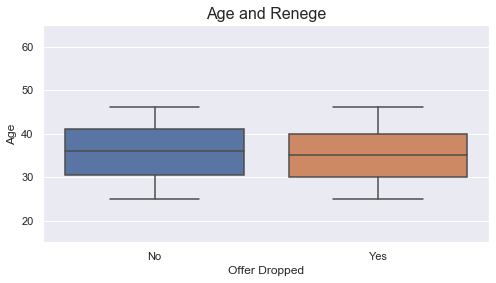

In [ ]:
plt.figure(figsize = (8,4))
g = sns.boxplot(x="offer_dropped",y="age", data=data)
plt.title('Age and Renege',fontsize = 16)#plt.title('Job Level and Attrition rate',fontsize = 16)
plt.ylim ([15,65])
plt.ylabel("Age",fontsize=12)
#plt.xticks([0,1,2,3,4],['Low','Medium','High','Very High','Executive'])
plt.xlabel("Offer Dropped",fontsize=12)#plt.xlabel("JobLevel",fontsize=12)
plt.show()

__Insight: Age does not seem to be a reason of offer drop__

#### <font color = brown> Statistical Approach: two sample t-test </font>

In [ ]:
from scipy import stats
stats.ttest_ind(data.loc[data["offer_dropped"] == 'Yes',"age"],data.loc[data["offer_dropped"] == 'No', "age"])

Ttest_indResult(statistic=-2.867305108363797, pvalue=0.004183251918114724)

__Insight: "age" is not very significant variable w.r.t target__

Similarly let's see if days_offered has an effect on offer_dropped

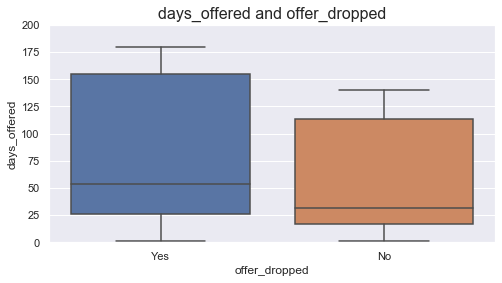

In [ ]:
plt.figure(figsize = (8,4))
g = sns.boxplot(x="offer_dropped",y="days_offered", data=data_final)
plt.title('days_offered and offer_dropped',fontsize = 16)
plt.ylim ([0,200])
plt.ylabel("days_offered",fontsize=12)
plt.xlabel("offer_dropped",fontsize=12)
plt.show()


__Insight: This calls for interview process optimization as delayed process may lead candidates to apply for jobs elsewhere due to lack of clarity__



#### <font color = brown>Statistical Approach: 2 sample t test </font>

In [ ]:
from scipy import stats
stats.ttest_ind(data.loc[data["offer_dropped"] == 'Yes',"days_offered"],data.loc[data["offer_dropped"] == 'No', "days_offered"])

Ttest_indResult(statistic=9.863591428137518, pvalue=1.931849482631004e-22)

__Insight: "days_offered" is very significant variable w.r.t target__

In [ ]:
data.columns

Index(['age', 'career_growth', 'days_offered', 'distance_from_home',
       'education_level', 'flexi_work', 'gender', 'jhi', 'marital_status',
       'offer_dropped', 'percent_hike', 'sourcing_channel',
       'timely_communication', 'total_rounds'],
      dtype='object')

In [ ]:
#Other Significant Numerical Variables
#jhi,percent_hike,total_rounds

# <font color = coral><center> Thank You</center> </font>